In [1]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import regex as re

In [2]:
import sys
sys.path.append("../")
from src.functions import *

In [3]:
sns.set_context("poster")
sns.set(rc={'figure.figsize': (20.,6.)})
sns.set_style('whitegrid')

In [4]:
df_main = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [5]:
df = df_main.copy()
df.dropna(axis = 0, how = 'all', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [7]:
df.isna().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [8]:
df =df.rename(columns={'Fatal (Y/N)': 'Fatality', 'Sex ': 'Sex','Case Number': 'Case_number', 'Species ':'Species'})

In [9]:
df.drop(df[df["Case_number"] == "0"].index,  inplace=True) 

In [10]:
df.drop(df[df["Case_number"] == "xx"].index,  inplace=True) 

In [11]:
dict(df.value_counts("Fatality"))

{'N': 4293,
 'Y': 1388,
 'UNKNOWN': 71,
 ' N': 7,
 'y': 1,
 'N ': 1,
 'M': 1,
 '2017': 1}

In [12]:
df["Fatality"] = df["Fatality"].replace([" N", "N "], "N")

In [13]:
df["Fatality"] = df["Fatality"].replace(["y"], "Y")

In [14]:
df["Fatality"] = df["Fatality"].replace(["M", "2017"], "UNKNOWN")

In [15]:
df.value_counts("Fatality")

Fatality
N          4301
Y          1389
UNKNOWN      73
dtype: int64

In [16]:
df.dropna(subset=["Fatality"], inplace = True)

In [17]:
df.isna().sum()

Case_number                  1
Date                         0
Year                         1
Type                         3
Country                     45
Area                       404
Location                   483
Activity                   419
Name                       153
Sex                        487
Age                       2519
Injury                      21
Fatality                     0
Time                      2961
Species                   2815
Investigator or Source      12
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5762
Unnamed: 23               5761
dtype: int64

In [18]:
df.value_counts("Year")

Year
2015.0    130
0.0       124
2017.0    123
2016.0    119
2014.0    118
         ... 
1787.0      1
1786.0      1
1785.0      1
1784.0      1
1804.0      1
Length: 242, dtype: int64

In [19]:
df.drop(df[df["Year"] < 1900].index, inplace=True) 

In [20]:
df.dropna(subset=["Year"], inplace = True)

In [21]:
df.columns

Index(['Case_number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatality', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Before being able to see the real fatality, there is need to clean the following not confirmed cases, which were described in Species column. 

In [22]:
no_confirmed = {'Shark involvement suspected but not confirmed': 4,
                'Shark involvement questionable': 4,
                'Shark involvement prior to death was not confirmed': 105,
                'Invalid': 102,
                'Shark involvement not confirmed': 88,
                'Questionable incident': 35, 
                'Questionable': 34,
                'No shark involvement': 21,
                'Shark involvement prior to death not confirmed': 13,
                'Shark involvement suspected but not confirmed': 4,
                'Shark involvement questionable': 4,
                'Questionable Incident': 3,
                'Shark involvement not cofirmed': 2}

In [23]:
df.drop(df[df["Species"] == 'Shark involvement suspected but not confirmed'].index, inplace=True) 

In [24]:
df.drop(df[df["Species"] == 'Shark involvement questionable'].index, inplace=True) 
df.drop(df[df["Species"] == 'Shark involvement prior to death was not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Invalid'].index, inplace=True)
df.drop(df[df["Species"] == 'Invalid'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable incident'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable'].index, inplace=True)
df.drop(df[df["Species"] == 'No shark involvement'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement prior to death not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement suspected but not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement questionable'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable Incident'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement not cofirmed'].index, inplace=True)




for i in no_confirmed:
    for j,row in df.iterrows():
        count = 0 
        if j == pd.isna(df["Species"].item):
            count += 1
            pass
        else:
            if j == i:
                print(j)      
count

for i in no_confirmed.keys():
    for j,row in df.iterrows():
        j = row["Species"]
        if j == i:
            print(i)
            print(j)
            count+=1
        elif j != i:
            count = 0


In [25]:
df.loc[df["Species"] == 'Shark involvement prior to death not confirmed']

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [26]:
df.drop(axis=0, index=None, columns = ["Unnamed: 23", "Unnamed: 22", "original order","Case Number.2","Case Number.1","href", "href formula","pdf","Investigator or Source", "Injury"], inplace=True)

In [27]:
dict(df.value_counts("Sex"))

{'M': 4098, 'F': 544, 'M ': 2, 'lli': 1, 'N': 1, '.': 1}

In [28]:
df["Sex"] = df["Sex"].replace(["M ", "lli"], "M")
df["Sex"] = df["Sex"].replace(["N"], "F")
df["Sex"] = df["Sex"].replace(["."], "F")

In [29]:
nuevo = []
for i,row in df.iterrows():
    nuevo.append(re.findall("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec", str(row["Date"])))

df["Month"] =list(nuevo)

In [30]:
df["Month"] = df.Month.apply(pd.Series)[0]
df.value_counts("Month")

Month
Jul    557
Aug    482
Sep    470
Jan    421
Jun    413
Oct    385
Apr    371
Dec    358
Mar    347
Nov    345
May    335
Feb    332
dtype: int64

In [31]:
df.dropna(subset=["Month"], inplace=True)

In [32]:
df['Month'] = pd.Categorical(df['Month'],
                                   categories=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"],
                                   ordered=True)

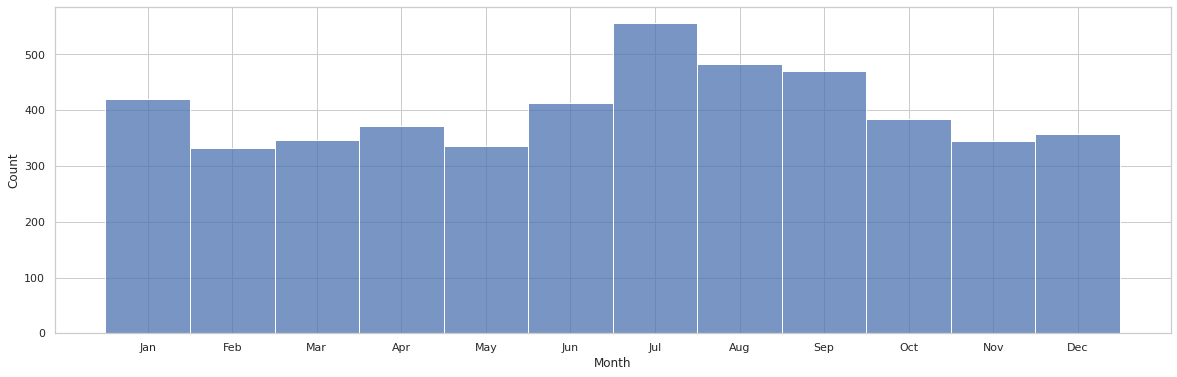

In [33]:
sns.histplot(data=df, x="Month",bins=50);

<AxesSubplot:ylabel='Country'>

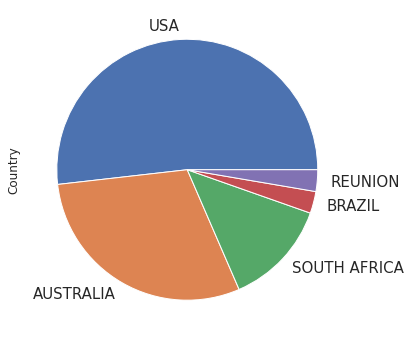

In [50]:
df.Country.value_counts().nlargest(5).plot.pie(labels=['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BRAZIL', 'REUNION'], fontsize=15, figsize=(6, 6))

In [35]:
df_AU = df[(df["Country"] == "USA")|(df["Country"] == "AUSTRALIA")]

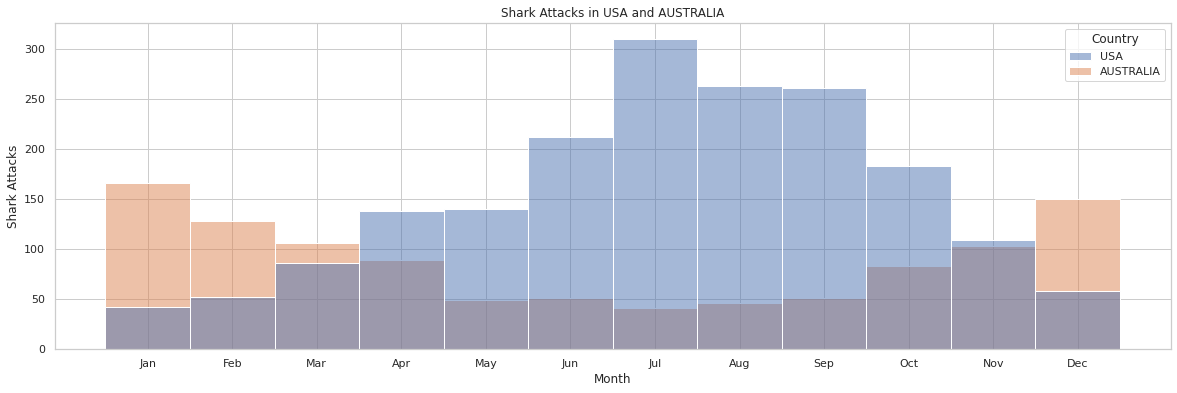

In [36]:
sns.histplot(data=df_AU, x="Month", hue="Country",bins=50);
plt.title("Shark Attacks in USA and AUSTRALIA")
plt.ylabel("Shark Attacks");

It is difficult to see the impact of the seasons in the shark attacks, as we can see depending on the country it might be more trickier to see the impact. Therefore we will take the country with more cases (USA). 

In [37]:
df_USA = df_AU[(df["Country"] == "USA")]

<ipython-input-37-5217c9270ffa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_USA = df_AU[(df["Country"] == "USA")]


In [38]:
# set categorical order
df_USA['Month'] = pd.Categorical(df_USA['Month'],
                                 categories=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"],
                                 ordered=True)


<ipython-input-38-16ca95fc6692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['Month'] = pd.Categorical(df_USA['Month'],


Text(0.5, 1.0, 'Shark Attacks in USA')

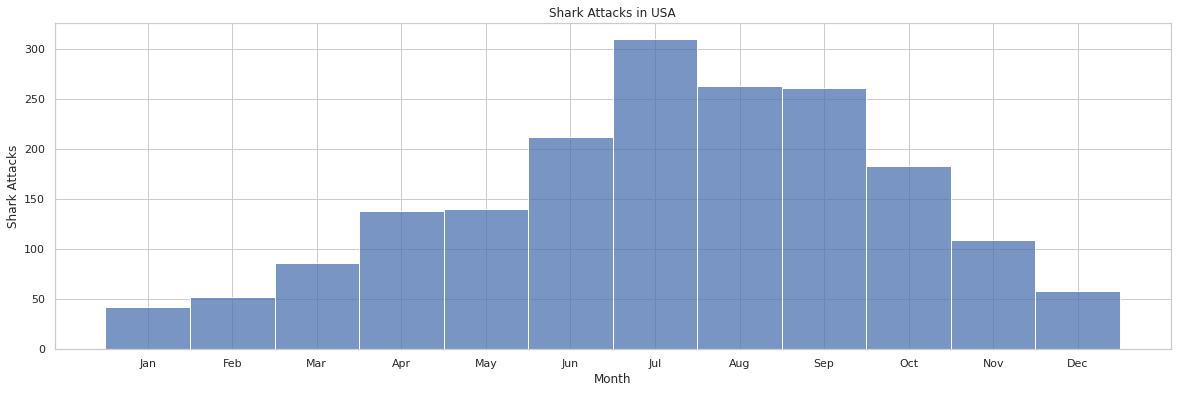

In [39]:
g = sns.histplot(x='Month', data=df_USA)
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA")

Qué pasa con las estaciones dependiendo en el area que estes? 

In [40]:
df_USA["Area"] = df_USA["Area"].replace([" North Carolina"], "North Carolina")

<ipython-input-40-c3975eb71f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA["Area"] = df_USA["Area"].replace([" North Carolina"], "North Carolina")


In [41]:
df_USA["Area"] = df_USA["Area"].replace(["South Carolina "], "South Carolina")

<ipython-input-41-5fb587e4d476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA["Area"] = df_USA["Area"].replace(["South Carolina "], "South Carolina")


In [42]:
df_USA.dropna(subset=["Area"], inplace = True)

<ipython-input-42-a1939e0833b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA.dropna(subset=["Area"], inplace = True)


In [43]:
df_USA.isna().sum()

Case_number      1
Date             0
Year             0
Type             0
Country          0
Area             0
Location        26
Activity        87
Name            15
Sex             71
Age            471
Fatality         0
Time           568
Species        771
Month            0
dtype: int64

In [44]:
df_USA.groupby(['Country', 'Area']) ['Year', 'Type', 'Activity','Fatality','Sex'].count()

<ipython-input-44-98529dd08481>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_USA.groupby(['Country', 'Area']) ['Year', 'Type', 'Activity','Fatality','Sex'].count()


Year  Type  Activity  Fatality  Sex
Country Area                                                  
USA     Alabama              11    11        10        11   10
        Alaska                1     1         1         1    1
        California          251   251       243       251  238
        Connecticut           3     3         3         3    2
        Delaware              6     6         6         6    6
        Florida             922   922       875       922  900
        Florida               1     1         1         1    1
        Georgia              12    12        12        12   12
        Guam                  1     1         1         1    1
        Hawaii              232   232       227       232  219
        Johnston Atoll        1     1         1         1    1
        Kentucky              1     1         1         1    0
        Louisiana            10    10        10        10   10
        Maine                 1     1         1         1    1
        Maryland              5     5         5         5    4
        Massachusetts        11    11        11        11    9
        Midway Atoll          1     1         1         1    1
        Mississippi           4     4         4         4    4
        Missouri              1     1         1         1    1
        New Jersey           35    35        33        35   32
        New Mexico            1     1         1         1    1
        New York              9     9         9         9    8
        North Carolina       80    80        76        80   74
        Oregon               29    29        29        29   29
        Palmyra Atoll         2     2         2         2    2
        Pennsylvania          1     1         1         1    1
        Puerto Rico          14    14        10        14   13
        Rhode Island          3     3         3         3    2
        South Carolina      125   125       110       125  120
        Texas                61    61        60        61   61
        US Virgin Islands     5     5         5         5    5
        Virginia             10    10        10        10   10
        Wake Island           1     1         1         1    1
        Washington            2     2         2         2    2

Is the season most mortifere based on the activities? Meaning surfing, kayaking, things that you would do in summer. 

In [48]:
dict(df.value_counts("Activity"))

{'Surfing': 912,
 'Swimming': 644,
 'Fishing': 339,
 'Spearfishing': 282,
 'Wading': 133,
 'Standing': 86,
 'Diving': 85,
 'Snorkeling': 84,
 'Bathing': 63,
 'Body boarding': 61,
 'Scuba diving': 61,
 'Body surfing': 45,
 'Swimming ': 37,
 'Kayaking': 31,
 'Treading water': 30,
 'Boogie boarding': 24,
 'Free diving': 23,
 'Pearl diving': 21,
 'Windsurfing': 19,
 'Boogie Boarding': 16,
 'Walking': 15,
 'Shark fishing': 13,
 'Surf skiing': 12,
 'Floating': 12,
 'Kayak Fishing': 11,
 'Fishing ': 11,
 'Surf-skiing': 10,
 'Rowing': 10,
 'Surf fishing': 10,
 'Canoeing': 10,
 'Sitting on surfboard': 9,
 'Freediving': 9,
 'Fishing for sharks': 9,
 'Diving for trochus': 8,
 'Paddle boarding': 8,
 'Fell overboard': 8,
 'Free diving for abalone': 7,
 'Playing': 7,
 'Scuba Diving': 7,
 'Diving for abalone': 7,
 'Surfing (sitting on his board)': 7,
 'Sea disaster': 7,
 'Kite Surfing': 6,
 'Surf skiing ': 6,
 'Stand-Up Paddleboarding': 6,
 'Kite surfing': 5,
 'Skindiving': 5,
 'Surfing ': 5,
 'Sea D

<AxesSubplot:ylabel='Activity'>

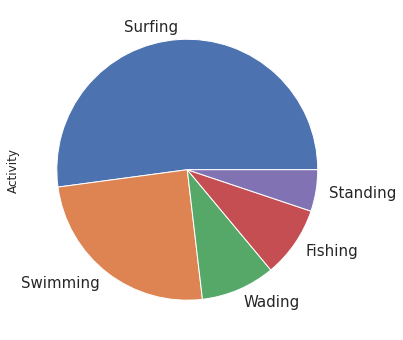

In [51]:
df_USA.Activity.value_counts().nlargest(5).plot.pie(fontsize=15, figsize=(6, 6))

In [58]:
df_leisure= df_USA[(df_USA['Activity'] == 'Surfing')|(df_USA['Activity'] == 'Swimming')|(df_USA['Activity'] == 'Diving')|(df_USA['Activity'] == 'Snorkeling')|(df_USA['Activity'] == 'Bathing')]

Text(0.5, 1.0, 'Shark Attacks in USA by leisure use')

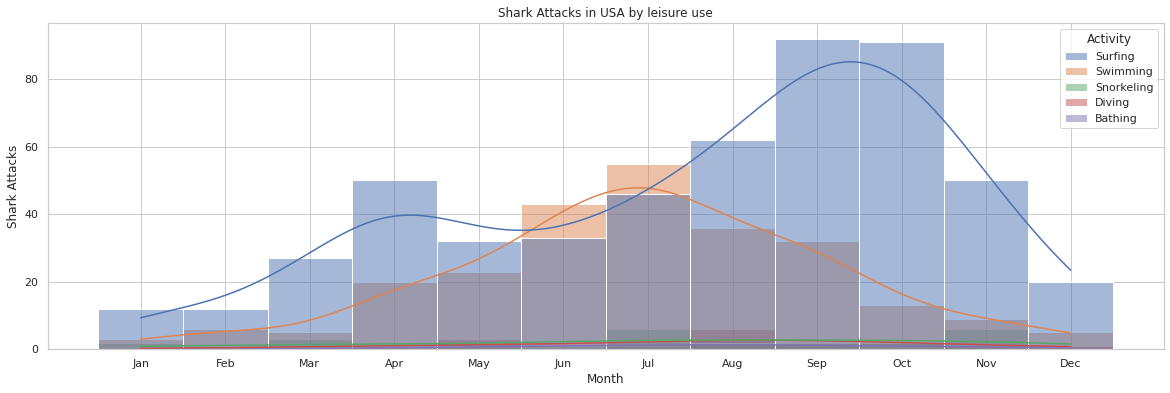

In [59]:
g = sns.histplot(x='Month', hue="Activity",data=df_leisure, kde=True)
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA by leisure use")

In [55]:
df_USA['Coast']= df_USA['Coast'][df_USA['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'In Pacific'
df_USA['Coast'][~df_USA['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'In Atlantic and Caribean'

<ipython-input-55-fd88b5e94eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['Coast']= df_USA['Coast'][df_USA['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'In Pacific'
<ipython-input-55-fd88b5e94eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['Coast']= df_USA['Coast'][df_USA['Area'].isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington'))] = 'In Pacific'
/home/lapalmi87/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Text(0.5, 1.0, 'Shark Attacks in USA by leisure use')

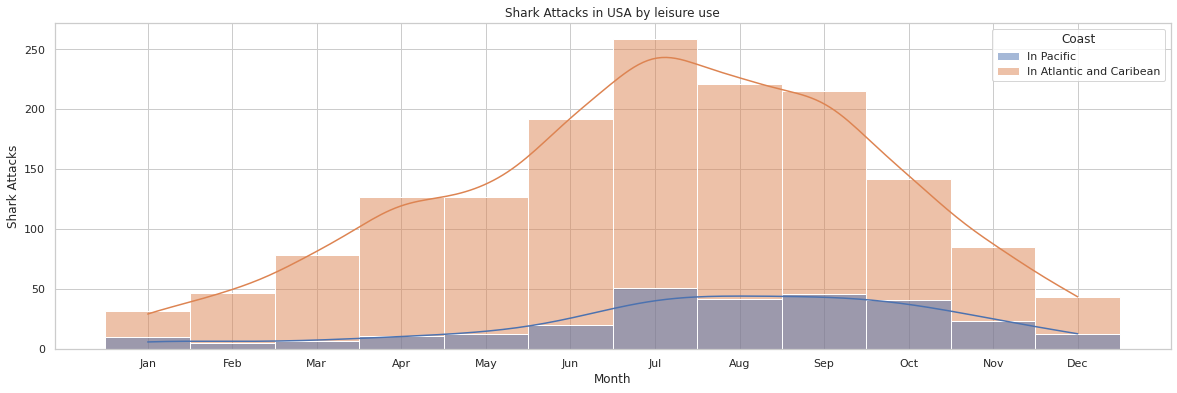

In [61]:
g = sns.histplot(x='Month', hue="Coast",data=df_USA, kde=True)
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA by leisure use")

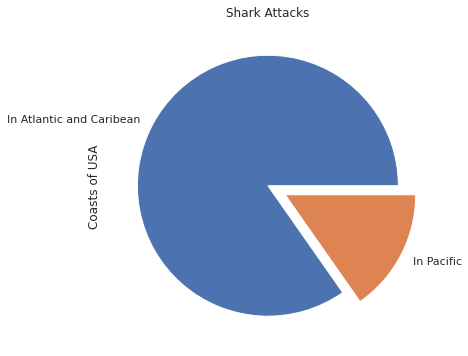

In [56]:
df_USA.Coast.value_counts().plot.pie(explode=(0, 0.15), title ='Shark Attacks')
plt.ylabel("Coasts of USA");

In [ ]:
#['Year', 'Type', 'Activity','Fatality','Sex']
#df.dropna(subset=["Year"], inplace = True)
#dict(df.value_counts("Month"))
#df[df.Month.notna()].astype('str').groupby(['Month']).count()
#df.Month.apply(pd.Series)[0].value_counts()
#df.drop(df[df["Month"] == ""].index,  inplace=True)
#df.loc[df[str("Month")] == "[]"]
#df.value_counts("Species ")

#importing all necessary libraries
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
  
# some more libraries to plot graph
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
  
# To establish connection
init_notebook_mode(connected = True)
  
  
# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',
  
            # location: Arizoana, California, Newyork
            locations = ['AZ', 'CA', 'NY'],
              
            # States of USA
            locationmode = 'USA-states',
              
            # colorscale can be added as per requirement
            colorscale = 'Portland',
              
            # text can be given anything you like
            text = ['text 1', 'text 2', 'text 3'],
            z = [1.0, 2.0, 3.0],
            colorbar = {'title': 'Colorbar Title Goes Here'})
              
layout = dict(geo ={'scope': 'usa'})
  
# passing data dictionary as a list 
choromap = go.Figure(data = [data], layout = layout)
  
# plotting graph
iplot(choromap)